# Quantum Phase Estimation

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastUtilsGate as fg
import numpy as np

In [4]:
def QFT_gate(n):
    qc = QuantumCircuit(n, name= "  QFT  ")
    for t in range(n):
        qc.h(t)
        for c in range(t+1, n):
            theta = np.pi/2**(c-t)
            qc.cp(theta, c, t)

    for i in range(int(n/2)):
        qc.swap(i, n-1-i)

    return qc.to_gate()


def inverse_QFT_gate(n):
    qc = QFT_gate(n).inverse()
    qc.name = "  iQFT  "
    return qc

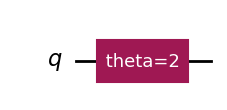

In [5]:
def phase_operator(theta):
    qc = QuantumCircuit(1)
    qc.p(theta, 0)
    return qc.to_gate(label= f' theta={theta} ')

qc = QuantumCircuit(1)
qc.compose(phase_operator(2), inplace=True)

qc.draw('mpl')

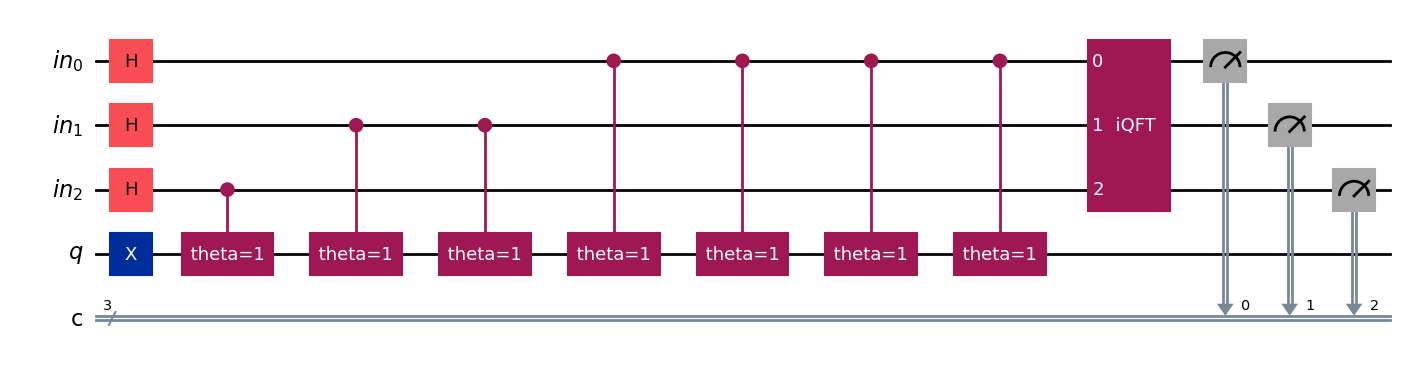

In [6]:
def QPE(n, U):
    xr = QuantumRegister(n, 'in')
    q = QuantumRegister(1, 'q')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(xr, q, c)

    cU = U.control(1) # rendo il gate fornito un gate controllato

    qc.h(xr)
    qc.x(q)

    for i in range(n):
        for j in range(2**i):
            qc = qc.compose(cU, [xr[n-1-i], q[0]])
    
    qc = qc.compose(inverse_QFT_gate(n), xr)

    qc.measure(xr, c)
    return qc



qc = QPE(3, phase_operator(1))
qc.draw('mpl')

In [24]:
n = 4
t = 0.5

qc = QPE(n, phase_operator(t*np.pi))
counts = fq.run(qc)
print(counts)

m = int(list(counts.keys())[0],2)
estimated_theta = m/2**(n-1)
print(f'La rotazione stimata è di {estimated_theta} pi greca')

{'0010': 1024}
La rotazione stimata è di 0.25 pi greca
